In [123]:
pip install catboost

     |████████████████████████████████| 69.2 MB 64 kB/s  eta 0:00:01    |█                               | 2.1 MB 195 kB/s eta 0:05:43     |██                              | 4.2 MB 1.0 MB/s eta 0:01:04     |███▋                            | 7.8 MB 2.8 MB/s eta 0:00:23     |████▉                           | 10.5 MB 2.0 MB/s eta 0:00:29     |█████▌                          | 11.9 MB 2.0 MB/s eta 0:00:29     |██████▋                         | 14.3 MB 621 kB/s eta 0:01:29     |█████████▎                      | 20.0 MB 5.5 MB/s eta 0:00:09     |█████████████▍                  | 29.0 MB 1.4 MB/s eta 0:00:30     |█████████████▉                  | 30.0 MB 6.3 MB/s eta 0:00:07     |████████████████████▋           | 44.5 MB 1.0 MB/s eta 0:00:24     |█████████████████████           | 45.3 MB 1.0 MB/s eta 0:00:24     |████████████████████████▍       | 52.8 MB 2.6 MB/s eta 0:00:07     |█████████████████████████▎      | 54.6 MB 1.2 MB/s eta 0:00:13     |███████████████████████████▏    | 58.7 MB 2.0 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier

In [6]:
files = os.listdir()

In [8]:
d = pd.read_csv(files[0], sep=';') # читаю все файлы с данными по скважинам и добавляю в одни DataFrame.
d1 = []
for i in files:
    if '.ipynb_checkpoints' in i:
        continue
    if 'catboost_info' in i: 
        continue
    if 'lab.ipynb' in i:
        continue
    
    d = pd.concat([d, pd.read_csv(i, sep=';')], ignore_index=True)
    

    


In [9]:
for i in d.columns: # удаляю колонки где количество nan превышает 100000 
    if d[i].isnull().sum() > 100000:
        del d[i]


In [10]:
for i in d.columns: # заполняю средним значением nan. 
    if d[i].isnull().sum() > 0:
        d[i] = d[i].fillna(d[i].mean()) 

In [11]:
d

,ESP.Frequency,ESP.IntakePressure,ESP.IntakeTemperature,ESP.Motor.CurrentU,ESP.Motor.CurrentV,ESP.Motor.CurrentW,ESP.Motor.VoltageAB,ESP.Motor.VoltageBC,ESP.Motor.VoltageCA,Sediments.Lab.Man,...,diff_FlowLinePressure,diff_ESP.IntakePressure,diff_ESP.Frequency,diff_ESP.Motor.CurrentUnbalance,diff_ESP.Motor.Load,diff_ESP.Motor.Resistance,diff_ESP.Motor.Temperature,diff_ESP.Motor.VoltageUnbalance,diff_ESP.RatedVoltage,Power
0,52.4,68.937612,63.074368,46.0,46.316667,46.000000,0.000000,0.000000,0.000000,117.518605,...,14.128561,-61.653193,-52.4,29.612527,-16.737334,-9408.897238,8.883248,-13.273234,-334.93391,0.000000
1,52.4,68.937612,89.000000,46.0,46.250000,46.016667,0.000000,0.000000,0.000000,117.518605,...,28.089389,-61.653193,-52.4,29.612527,-16.737334,-6439.198101,-114.000000,-13.273234,-300.00000,0.000000
2,52.4,68.937612,89.000000,46.0,46.666667,46.000000,0.000000,0.000000,0.000000,117.518605,...,28.098855,-61.653193,-52.4,29.612527,-16.737334,-6539.114862,-114.000000,-13.273234,-300.00000,0.000000
3,52.4,68.937612,89.000000,46.0,46.416667,46.016667,0.000000,0.000000,0.000000,117.518605,...,28.062232,-61.653193,-52.4,29.612527,-16.737334,-6630.967593,-114.000000,-13.273234,-300.00000,0.000000
4,52.4,68.937612,89.000000,46.0,46.466667,46.116667,0.000000,0.000000,0.000000,117.518605,...,28.085433,-61.653193,-52.4,29.612527,-16.737334,-6560.415598,-114.000000,-13.273234,-300.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217433,54.8,76.465741,88.000000,24.0,24.000000,24.000000,377.066667,377.283333,373.533333,117.518605,...,26.787121,-46.465741,-54.8,19.000000,-18.135417,-9969.000000,-105.000000,-13.273234,-300.00000,35637.487937
217434,54.8,76.560000,88.000000,24.0,23.883333,24.000000,376.666667,377.050000,373.200000,117.518605,...,26.816050,-46.560000,-54.8,19.000000,-18.046349,-9969.000000,-105.000000,-13.273234,-300.00000,35549.038880
217435,54.8,76.770833,88.000000,24.0,23.866667,24.000000,376.433333,376.366667,372.716667,117.518605,...,26.845561,-46.770833,-54.8,19.000000,-18.236667,-9969.000000,-105.000000,-13.273234,-300.00000,35496.575050
217436,54.8,76.665000,88.000000,24.0,23.866667,24.000000,376.233333,376.033333,372.566667,117.518605,...,26.863899,-46.665000,-54.8,19.000000,-18.232807,-9969.000000,-105.000000,-13.273234,-300.00000,35474.983913


In [13]:
t = pd.DataFrame(d['target'])

In [15]:
target = pd.DataFrame(pd.to_numeric(t['target'], downcast='integer')) # target float --> int

<AxesSubplot:xlabel='target', ylabel='count'>

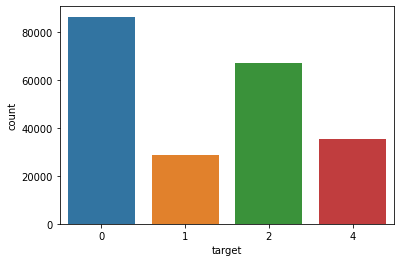

In [16]:
sns.countplot(x='target', data=target)

In [17]:
for i, j in enumerate(target['target']): # все три вида поломок превращаю в один вид поломок.
    if j != 0:
        target['target'][i] = int(1)

<AxesSubplot:xlabel='target', ylabel='count'>

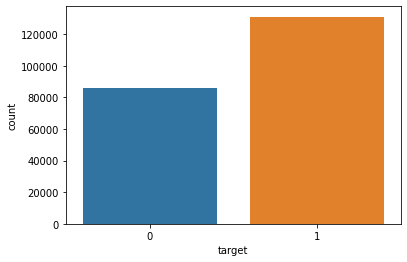

In [18]:
sns.countplot(x='target', data=target)

In [19]:
d['target_1'] = target['target'] # добавляю новую колонку, бинарный target

In [20]:
d

,ESP.Frequency,ESP.IntakePressure,ESP.IntakeTemperature,ESP.Motor.CurrentU,ESP.Motor.CurrentV,ESP.Motor.CurrentW,ESP.Motor.VoltageAB,ESP.Motor.VoltageBC,ESP.Motor.VoltageCA,Sediments.Lab.Man,...,diff_ESP.IntakePressure,diff_ESP.Frequency,diff_ESP.Motor.CurrentUnbalance,diff_ESP.Motor.Load,diff_ESP.Motor.Resistance,diff_ESP.Motor.Temperature,diff_ESP.Motor.VoltageUnbalance,diff_ESP.RatedVoltage,Power,target_1
0,52.4,68.937612,63.074368,46.0,46.316667,46.000000,0.000000,0.000000,0.000000,117.518605,...,-61.653193,-52.4,29.612527,-16.737334,-9408.897238,8.883248,-13.273234,-334.93391,0.000000,0
1,52.4,68.937612,89.000000,46.0,46.250000,46.016667,0.000000,0.000000,0.000000,117.518605,...,-61.653193,-52.4,29.612527,-16.737334,-6439.198101,-114.000000,-13.273234,-300.00000,0.000000,0
2,52.4,68.937612,89.000000,46.0,46.666667,46.000000,0.000000,0.000000,0.000000,117.518605,...,-61.653193,-52.4,29.612527,-16.737334,-6539.114862,-114.000000,-13.273234,-300.00000,0.000000,0
3,52.4,68.937612,89.000000,46.0,46.416667,46.016667,0.000000,0.000000,0.000000,117.518605,...,-61.653193,-52.4,29.612527,-16.737334,-6630.967593,-114.000000,-13.273234,-300.00000,0.000000,0
4,52.4,68.937612,89.000000,46.0,46.466667,46.116667,0.000000,0.000000,0.000000,117.518605,...,-61.653193,-52.4,29.612527,-16.737334,-6560.415598,-114.000000,-13.273234,-300.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217433,54.8,76.465741,88.000000,24.0,24.000000,24.000000,377.066667,377.283333,373.533333,117.518605,...,-46.465741,-54.8,19.000000,-18.135417,-9969.000000,-105.000000,-13.273234,-300.00000,35637.487937,1
217434,54.8,76.560000,88.000000,24.0,23.883333,24.000000,376.666667,377.050000,373.200000,117.518605,...,-46.560000,-54.8,19.000000,-18.046349,-9969.000000,-105.000000,-13.273234,-300.00000,35549.038880,1
217435,54.8,76.770833,88.000000,24.0,23.866667,24.000000,376.433333,376.366667,372.716667,117.518605,...,-46.770833,-54.8,19.000000,-18.236667,-9969.000000,-105.000000,-13.273234,-300.00000,35496.575050,1
217436,54.8,76.665000,88.000000,24.0,23.866667,24.000000,376.233333,376.033333,372.566667,117.518605,...,-46.665000,-54.8,19.000000,-18.232807,-9969.000000,-105.000000,-13.273234,-300.00000,35474.983913,1


In [146]:
d = d.sample(frac=1).reset_index(drop=True) # перетасовка строк фрейма

In [147]:
test, train = np.split(d, [int(.1*len(d))]) #разделение на тестовую и трейновую 

In [148]:
X_train = train.drop(["target", 'target_1'], axis=1)
y_train = train["target_1"]
len(y_train)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [151]:
cbc = CatBoostClassifier(eval_metric = 'Accuracy', 
                         use_best_model = True, 
                         random_seed = 42,
                         iterations=200)

In [152]:
features = np.where(X_train.dtypes != float)[0]

In [153]:
cbc.fit(X_train, y_train, 
        cat_features=features, 
        eval_set= (X_test, y_test), 
        early_stopping_rounds=100)

Learning rate set to 0.222354
0:	learn: 0.7420156	test: 0.7425330	best: 0.7425330 (0)	total: 211ms	remaining: 42s
1:	learn: 0.7801426	test: 0.7810624	best: 0.7810624 (1)	total: 428ms	remaining: 42.4s
2:	learn: 0.8112433	test: 0.8142007	best: 0.8142007 (2)	total: 669ms	remaining: 43.9s
3:	learn: 0.8310956	test: 0.8313447	best: 0.8313447 (3)	total: 922ms	remaining: 45.2s
4:	learn: 0.8287130	test: 0.8292496	best: 0.8313447 (3)	total: 1.11s	remaining: 43.2s
5:	learn: 0.8324689	test: 0.8338230	best: 0.8338230 (5)	total: 1.37s	remaining: 44.2s
6:	learn: 0.8430721	test: 0.8423823	best: 0.8423823 (6)	total: 1.52s	remaining: 42s
7:	learn: 0.8471857	test: 0.8480033	best: 0.8480033 (7)	total: 1.74s	remaining: 41.8s
8:	learn: 0.8511779	test: 0.8526278	best: 0.8526278 (8)	total: 1.92s	remaining: 40.8s
9:	learn: 0.8531324	test: 0.8544163	best: 0.8544163 (9)	total: 2.12s	remaining: 40.4s
10:	learn: 0.8725121	test: 0.8728123	best: 0.8728123 (10)	total: 2.29s	remaining: 39.4s
11:	learn: 0.8824766	test:

94:	learn: 0.9749227	test: 0.9736835	best: 0.9736835 (94)	total: 19.4s	remaining: 21.5s
95:	learn: 0.9749994	test: 0.9736069	best: 0.9736835 (94)	total: 19.6s	remaining: 21.2s
96:	learn: 0.9751974	test: 0.9737857	best: 0.9737857 (96)	total: 19.8s	remaining: 21s
97:	learn: 0.9753698	test: 0.9739390	best: 0.9739390 (97)	total: 20s	remaining: 20.8s
98:	learn: 0.9753762	test: 0.9741434	best: 0.9741434 (98)	total: 20.2s	remaining: 20.6s
99:	learn: 0.9763791	test: 0.9752421	best: 0.9752421 (99)	total: 20.4s	remaining: 20.4s
100:	learn: 0.9762577	test: 0.9751654	best: 0.9752421 (99)	total: 20.6s	remaining: 20.2s
101:	learn: 0.9766282	test: 0.9752676	best: 0.9752676 (101)	total: 20.8s	remaining: 20s
102:	learn: 0.9766920	test: 0.9754465	best: 0.9754465 (102)	total: 21s	remaining: 19.8s
103:	learn: 0.9771647	test: 0.9758553	best: 0.9758553 (103)	total: 21.2s	remaining: 19.6s
104:	learn: 0.9773244	test: 0.9761363	best: 0.9761363 (104)	total: 21.4s	remaining: 19.4s
105:	learn: 0.9775735	test: 0.9

186:	learn: 0.9890391	test: 0.9874805	best: 0.9874805 (186)	total: 37.1s	remaining: 2.58s
187:	learn: 0.9890646	test: 0.9875827	best: 0.9875827 (187)	total: 37.3s	remaining: 2.38s
188:	learn: 0.9892882	test: 0.9877105	best: 0.9877105 (188)	total: 37.5s	remaining: 2.18s
189:	learn: 0.9893010	test: 0.9877871	best: 0.9877871 (189)	total: 37.7s	remaining: 1.98s
190:	learn: 0.9893521	test: 0.9878382	best: 0.9878382 (190)	total: 37.9s	remaining: 1.78s
191:	learn: 0.9895117	test: 0.9880171	best: 0.9880171 (191)	total: 38s	remaining: 1.58s
192:	learn: 0.9896395	test: 0.9880426	best: 0.9880426 (192)	total: 38.2s	remaining: 1.39s
193:	learn: 0.9896331	test: 0.9881193	best: 0.9881193 (193)	total: 38.4s	remaining: 1.19s
194:	learn: 0.9896778	test: 0.9881704	best: 0.9881704 (194)	total: 38.6s	remaining: 990ms
195:	learn: 0.9897609	test: 0.9881959	best: 0.9881959 (195)	total: 38.8s	remaining: 791ms
196:	learn: 0.9897353	test: 0.9881193	best: 0.9881959 (195)	total: 39s	remaining: 594ms
197:	learn: 0.

In [154]:
cbc.score(X_test, y_test)

0.9881959171159201

In [155]:
test_target = pd.DataFrame(test['target_1']) # правильные ответы тестовой выборки 

In [156]:
test = test.drop(["target", 'target_1'], axis=1) # удаляю ответы из тестовой выборки 

In [157]:
pred = cbc.predict(test) # предстказания на тестовой выборке 
pred

array([1, 1, 1, ..., 1, 0, 1])

In [158]:
len(pred) 
 

21743

In [159]:
pred_1 = pd.DataFrame(pred) # превращаю предстказанные значения в data frame для удобной конкатенации 

In [160]:
test_target['pred_target'] = pred_1[0] # конкатенирую правльные ответы тестовой выборки с предсказанными ответами 

In [161]:
l = [] # считаю количество не правильно класифицированных значений
for i in range(len(test_target['target_1'])):
    if test_target['target_1'][i] != test_target['pred_target'][i]:
        l.append(1)


In [162]:
len(l) # сколько не верно класифицированных значений из 21743

251

In [163]:
251 / 21743 * 100 # какой процент не верно класифицированных значений на данных которые модель не видела. 

1.154394517775836

In [ ]:
точность класификации 98,5%  